# UMAP for Dimensionality Reduction

## Table of Contents
1. [Introduction](#Introduction)
2. [Why UMAP Matters](#Why-UMAP-Matters)
3. [Intuition](#Intuition)
4. [Step 1 – Load the Dataset](#Step-1-–-Load-the-Dataset)
5. [Step 2 – Apply UMAP](#Step-2-–-Apply-UMAP)
6. [Step 3 – Visualize UMAP Results](#Step-3-–-Visualize-UMAP-Results)
7. [Step 4 – Effect of Hyperparameters](#Step-4-–-Effect-of-Hyperparameters)
8. [Limitations of UMAP](#Limitations-of-UMAP)
9. [Key Takeaways](#Key-Takeaways)
11. [How UMAP Works (Mathematical Explanation)](#How-UMAP-Works-Mathematical-Explanation)

---

## Introduction  

Imagine you have a huge stack of handwritten digit images ✍️ (like the digits 0–9). Each image isn’t just a single number, it’s thousands of pixel values!  

If you wanted to organize these digits so that all the "3"s cluster together and the "7"s are nearby, how would you do it?  

👉 **UMAP (Uniform Manifold Approximation and Projection)** was introduced by 
McInnes, Healy, and Melville (2018) [arXiv:1802.03426](https://arxiv.org/abs/1802.03426). 

It helps by taking this  **high-dimensional data** (pixels) and projecting it into **2D or 3D space**.  

In this new space:  
- Similar digits (like "3" and "8") end up closer together  
- Dissimilar digits (like "1" and "9") move farther apart  
- The overall structure of the dataset becomes visible at a glance  

---

## Why UMAP Matters
- Preserves **local neighborhoods** better than PCA
- Often produces **clearer clusters** for nonlinear data
- Fast and scalable for large datasets

---

## Intuition  

Think of your dataset as points scattered in a high-dimensional space.  
UMAP tries to answer two questions:

**Who are my closest friends?**  
- For each point, UMAP looks around to find its nearest neighbors.  

**How should I place myself in a simpler world (2D/3D) so I stay close to my friends?**  
- If two points are close in the original space, they should also be close in the embedding.  
- If they are far apart, UMAP pushes them apart in the new space.  

In short:  
- Build a "friendship graph" (neighbors in high-D)  
- Re-draw that graph in 2D/3D so friendships are preserved as much as possible   

This is where UMAP’s **hyperparameters** come into play:  
- **`n_neighbors`**: Controls how many friends each point considers.  
  - Small → focuses on local structure (fine details, more clusters).  
  - Large → captures more global structure (big-picture trends).  

- **`min_dist`**: Controls how tightly points are packed together in the low-dimensional space.  
  - Small → clusters are compact (points stick closer).  
  - Large → clusters are more spread out.  

- **`spread`**: Works together with `min_dist` to set the overall scale of clusters. Think of it as the "stretchiness" of the embedding.    

👉 In other words, these parameters let you tune whether you care more about the *small cliques* or the *big picture friendships*.  



---

## Step 1 – Load the MNIST Dataset



In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Hatice\Documents\GitHub\exploreAI\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Hatice\Documents\GitHub\exploreAI\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Hatice\Documents\GitHub\exploreAI\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
# Load MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)


Data shape: (70000, 784)
Labels shape: (70000,)


## Step 2 – Apply UMAP

In [ ]:
# install the libraries
!pip install umap-learn

**Note on Scaling:**  
Since UMAP relies on distances between points, feature scaling is usually recommended when the dataset contains variables on very different scales (e.g., age in years vs. income in dollars).  
For image datasets like MNIST, however, all pixel intensities share the same range, so scaling is not strictly necessary. That’s why we apply UMAP directly without preprocessing.

In [ ]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

print("UMAP-transformed shape:", X_umap.shape)

UMAP-transformed shape: (70000, 2)


## Step 3 – Visualize UMAP Results

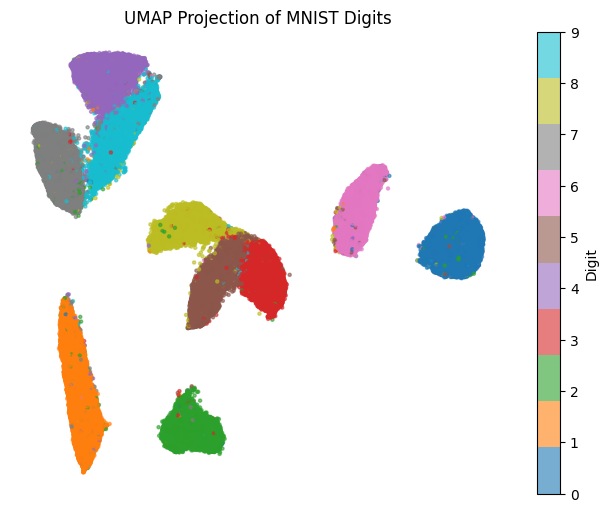

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.title("UMAP Projection of MNIST Digits")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.axis('off')  # for cleaner look
plt.show()

## Step 4 – Effect of Hyperparameters

To understand how hyperparameters affect UMAP, we’ll use a subset of the dataset for speed.

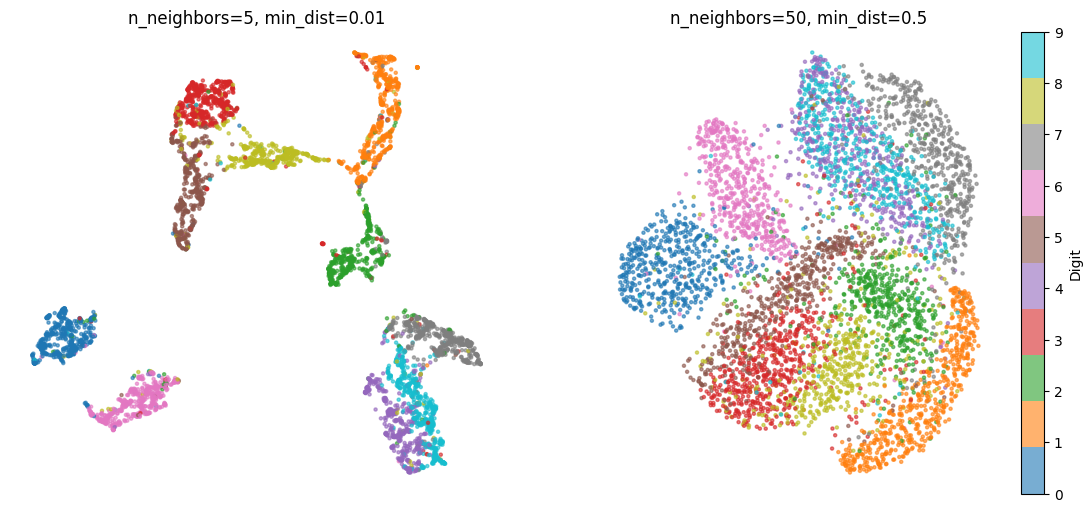

In [ ]:
# Subsample 5,000 points for faster visualization
np.random.seed(42)
indices = np.random.choice(len(X), 5000, replace=False)
X_sub, y_sub = X[indices], y[indices]

# Try different n_neighbors and min_dist
fig, axs = plt.subplots(1, 2, figsize=(14,6))

for ax, params in zip(axs, [(5, 0.01), (50, 0.5)]):
    reducer = umap.UMAP(n_neighbors=params[0], min_dist=params[1], random_state=42)
    X_umap_temp = reducer.fit_transform(X_sub)
    scatter = ax.scatter(X_umap_temp[:,0], X_umap_temp[:,1], c=y_sub, cmap='tab10', s=5, alpha=0.6)
    ax.set_title(f"n_neighbors={params[0]}, min_dist={params[1]}")
    ax.axis('off')
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.show()

## Limitations of UMAP
- Sensitive to hyperparameters (`n_neighbors`, `min_dist`)
- Nonlinear → results are not always reproducible without a fixed random seed
- Components are harder to interpret than PCA
- Focuses on local structure, so distances between clusters are not always meaningful

## Key Takeaways
- ✅ UMAP preserves local structure in high-dimensional data
- ✅ Great for visualizing nonlinear datasets
- ✅ Hyperparameters control the balance of local vs global structure
- ✅ Can complement PCA or other linear methods

## How UMAP Works (Mathematical Explanation)  

1. **High-Dimensional Graph Construction**  
   - For each point $x_i$, find its $k$ nearest neighbors.  
   - Define a fuzzy membership strength for edge $(i,j)$:  

   $$
   w_{ij} = \exp\left(-\frac{d(x_i, x_j) - \rho_i}{\sigma_i}\right)
   $$

   where $\rho_i$ is the distance to the nearest neighbor (to avoid very small distances),  
   and $\sigma_i$ is a scaling parameter.  

   The final weight is made symmetric by:  

   $$
   w_{ij}^{sym} = w_{ij} + w_{ji} - w_{ij} \cdot w_{ji}
   $$

2. **Low-Dimensional Graph Construction**  
   - Place points in low-D space (2D/3D).  
   - Define a similar fuzzy membership:  

   $$
   v_{ij} = \frac{1}{1 + a \cdot \|y_i - y_j\|^{2b}}
   $$

   where $a$ and $b$ are constants chosen to control the shape of the curve.  

3. **Optimization (Cross-Entropy)**  
   Minimize the difference between high-D and low-D graphs:  

   $$
   C = \sum_{(i,j)} \Big[ w_{ij}^{sym} \log\frac{w_{ij}^{sym}}{v_{ij}} + (1 - w_{ij}^{sym}) \log\frac{1 - w_{ij}^{sym}}{1 - v_{ij}} \Big]
   $$  

   → This ensures neighbors in high-D stay neighbors in low-D.  

---